In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar as sc
from iapws import IAPWS97 as steam
import os

In [20]:
path = os.path.dirname(os.getcwd())

path0M = path + '\\0M Data\\'

path_4M = path + '\\.4M Data\\'

path_7M = path + '\\.7M Data\\'

path1M = path + '\\1M Data\\'

path1_3M = path + '\\1.3M Data\\'

path1_6M = path + '\\1.6M Data\\'

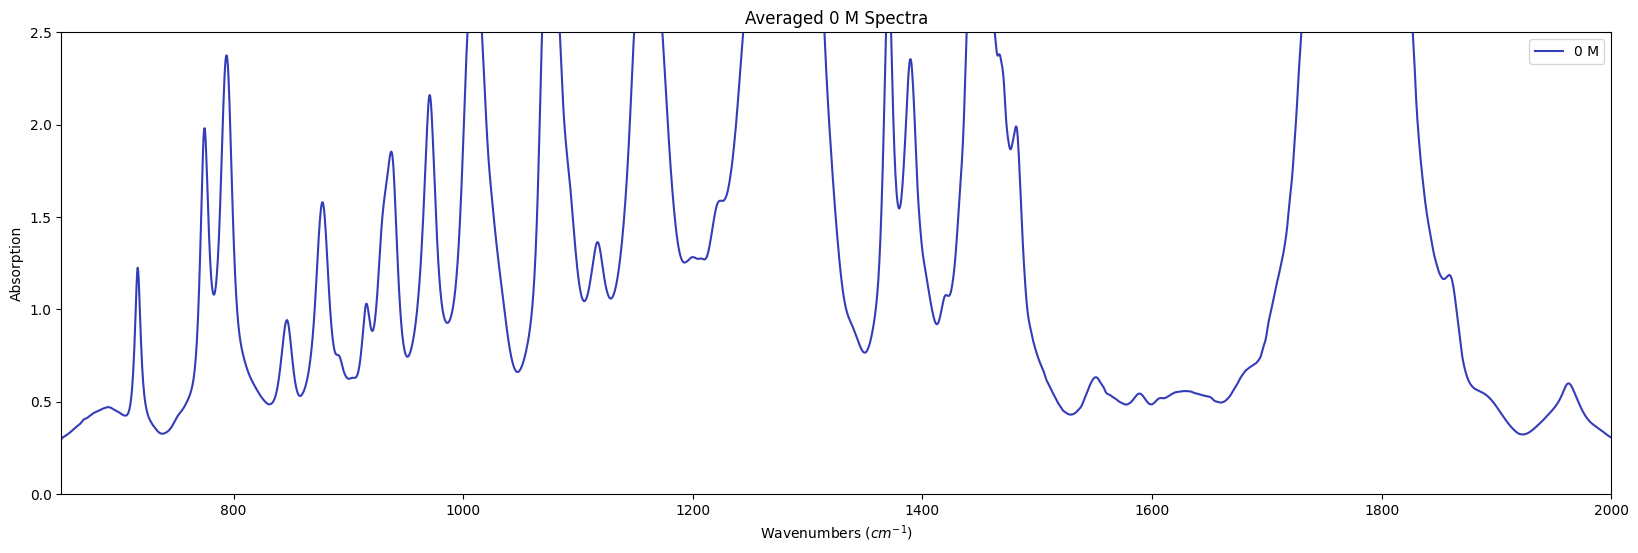

In [51]:
# ----- Averaging the spectra for 0 M
df0 = np.array([pd.read_csv(path0M + '0M_1.tsv',sep = '\t'),pd.read_csv(path0M + '0M_2.tsv',sep = '\t'),\
                   pd.read_csv(path0M + '0M_3.tsv',sep = '\t'),pd.read_csv(path0M + '0M_4.tsv',sep = '\t'),\
                    pd.read_csv(path0M + '0M_5.tsv',sep = '\t'),pd.read_csv(path0M + '0M_6.tsv',sep = '\t')])

ZeroM = (df0[0] + df0[1] + df0[2] + df0[3] + df0[4] + df0[5]) / 6

header_array = np.array(['X','Y'])
df_0M = pd.DataFrame(ZeroM,columns = header_array)

# display(df_0M)

plt.figure(figsize = (20,6))
plt.plot(df_0M['X'],df_0M['Y'],label = '0 M', color = '#353cb8')
plt.legend()
plt.title('Averaged 0 M Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.ylim(0,2.5)
plt.xlim(650,2000)
plt.show()

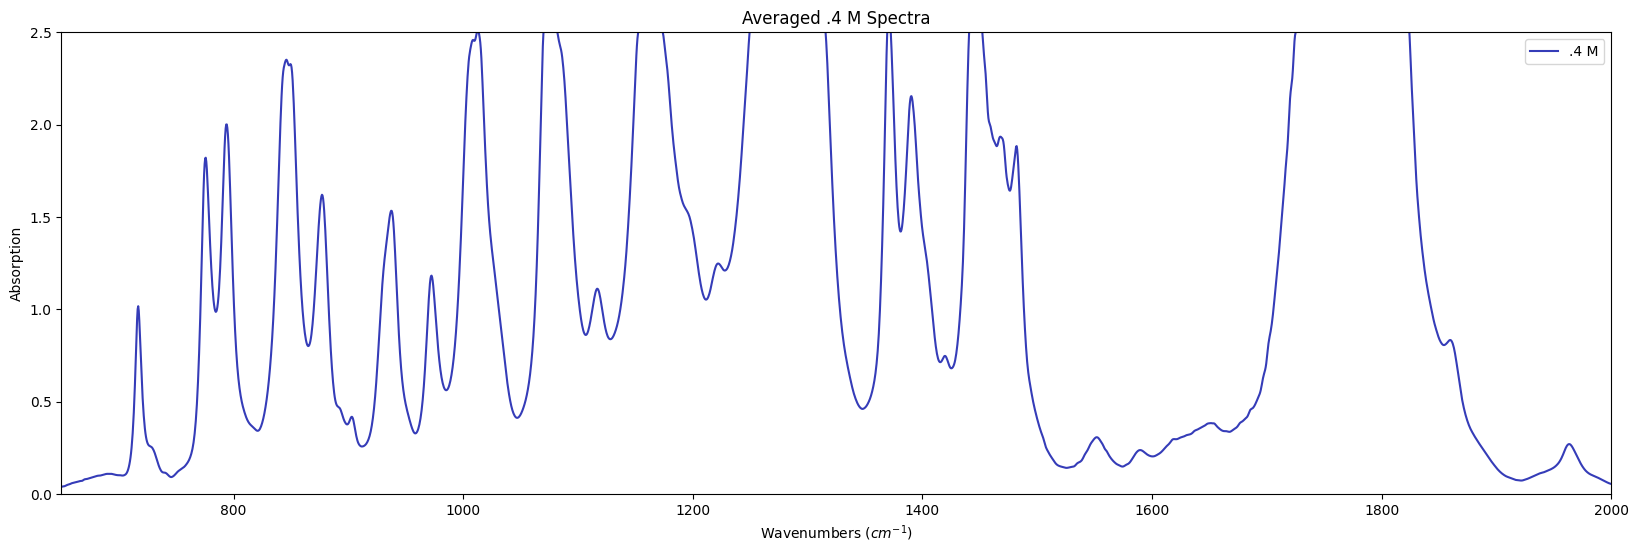

In [52]:
# ----- Averaging the spectra for .4 M
df0 = np.array([pd.read_csv(path_4M + '-4ML1_1.tsv',sep = '\t'),pd.read_csv(path_4M + '-4ML1_2.tsv',sep = '\t'),\
                   pd.read_csv(path_4M + '-4ML2_1.tsv',sep = '\t'),pd.read_csv(path_4M + '-4ML2_2.tsv',sep = '\t'),\
                    pd.read_csv(path_4M + '-4ML3_1.tsv',sep = '\t'),pd.read_csv(path_4M + '-4ML3_2.tsv',sep = '\t')])

ZeroM = (df0[0] + df0[1] + df0[2] + df0[3] + df0[4] + df0[5]) / 6

df__4M = pd.DataFrame(ZeroM,columns = header_array)

# display(df_0M)

plt.figure(figsize = (20,6))
plt.plot(df__4M['X'],df__4M['Y'],label = '.4 M', color = '#353cb8')
plt.legend()
plt.title('Averaged .4 M Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.ylim(0,2.5)
plt.xlim(650,2000)
plt.show()

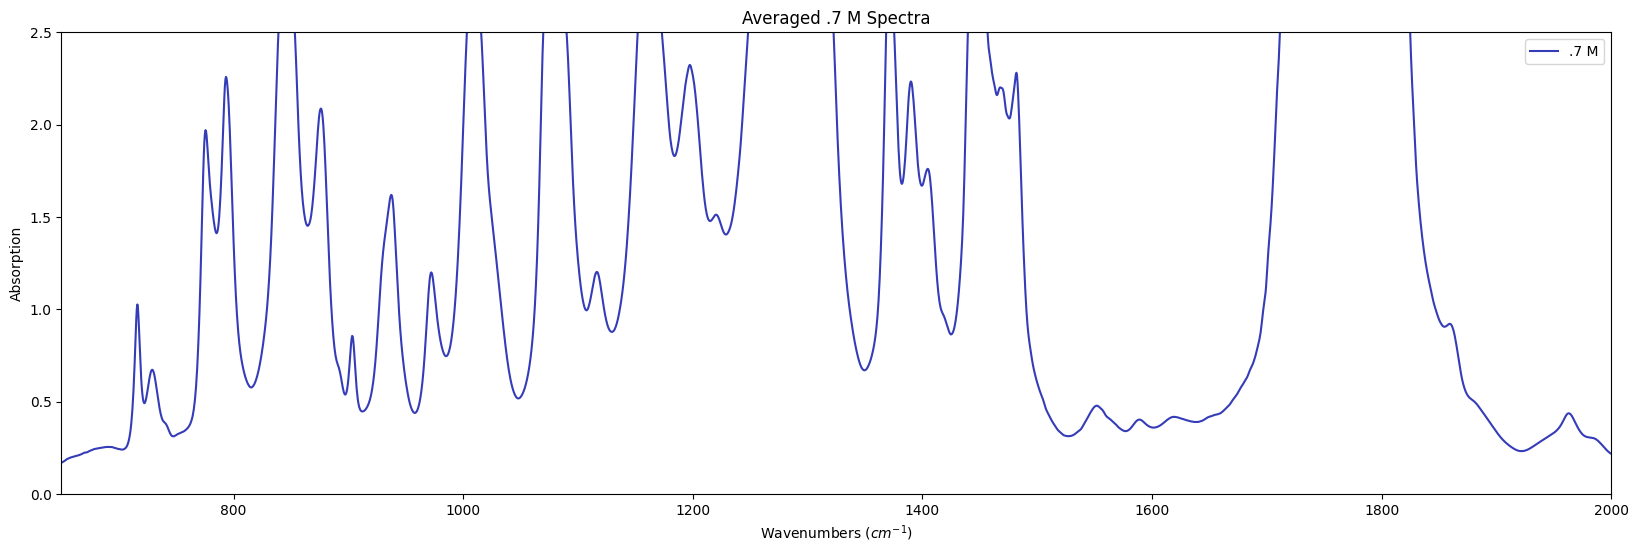

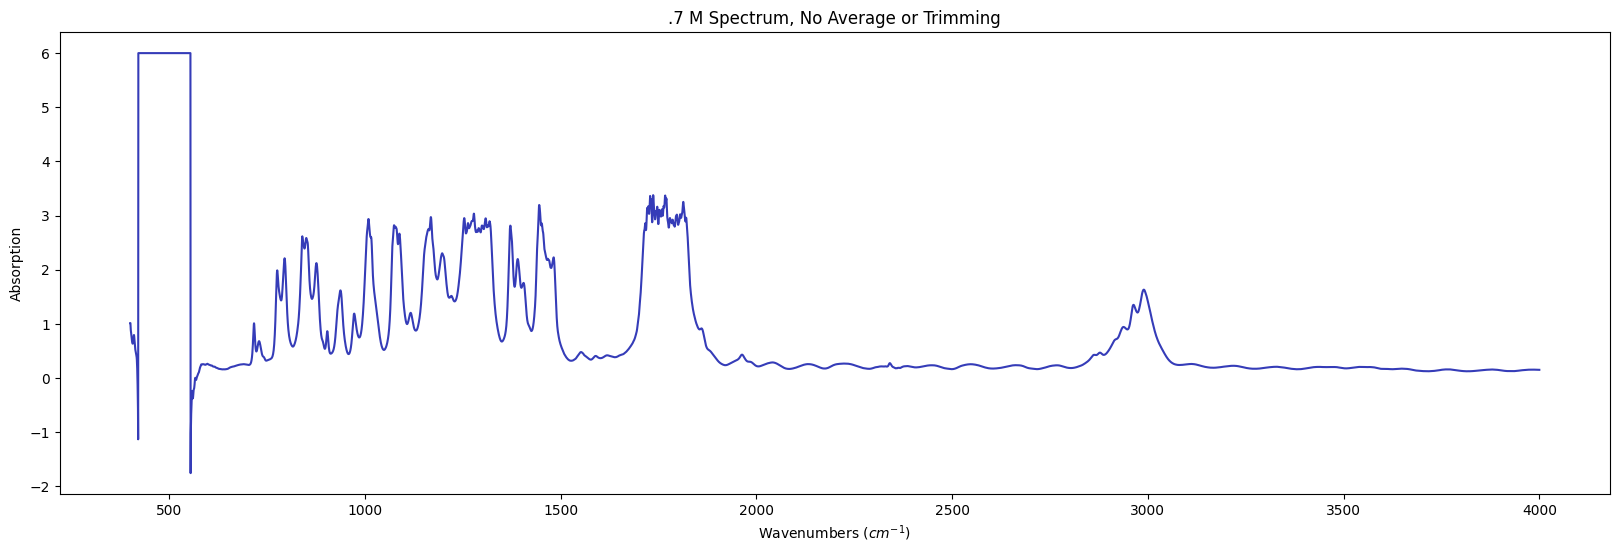

In [59]:
# ----- Averaging the spectra for .7 M
df0 = np.array([pd.read_csv(path_7M + '-7M_1.tsv',sep = '\t')[518:],pd.read_csv(path_7M + '-7M_2.tsv',sep = '\t')[518:],\
                   pd.read_csv(path_7M + '-7M_3.tsv',sep = '\t')[518:],pd.read_csv(path_7M + '-7M_4.tsv',sep = '\t')[518:],\
                    pd.read_csv(path_7M + '-7M_5.tsv',sep = '\t')[518:],pd.read_csv(path_7M + '-7M_6.tsv',sep = '\t')[518:]])

ZeroM = (df0[0] + df0[1] + df0[2] + df0[3] + df0[4] + df0[5]) / 6

df__7M = pd.DataFrame(ZeroM,columns = header_array)

# display(df_0M)

plt.figure(figsize = (20,6))
plt.plot(df__7M['X'],df__7M['Y'],label = '.7 M', color = '#353cb8')
plt.legend()
plt.title('Averaged .7 M Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.ylim(0,2.5)
plt.xlim(650,2000)
plt.show()

# plot the data under 650
d0 = pd.read_csv(path_7M + '-7M_1.tsv',sep = '\t')

plt.figure(figsize = (20,6))
plt.plot(d0['X'],d0['Y'],color = '#353cb8')

plt.title('.7 M Spectrum, No Average or Trimming')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.show()

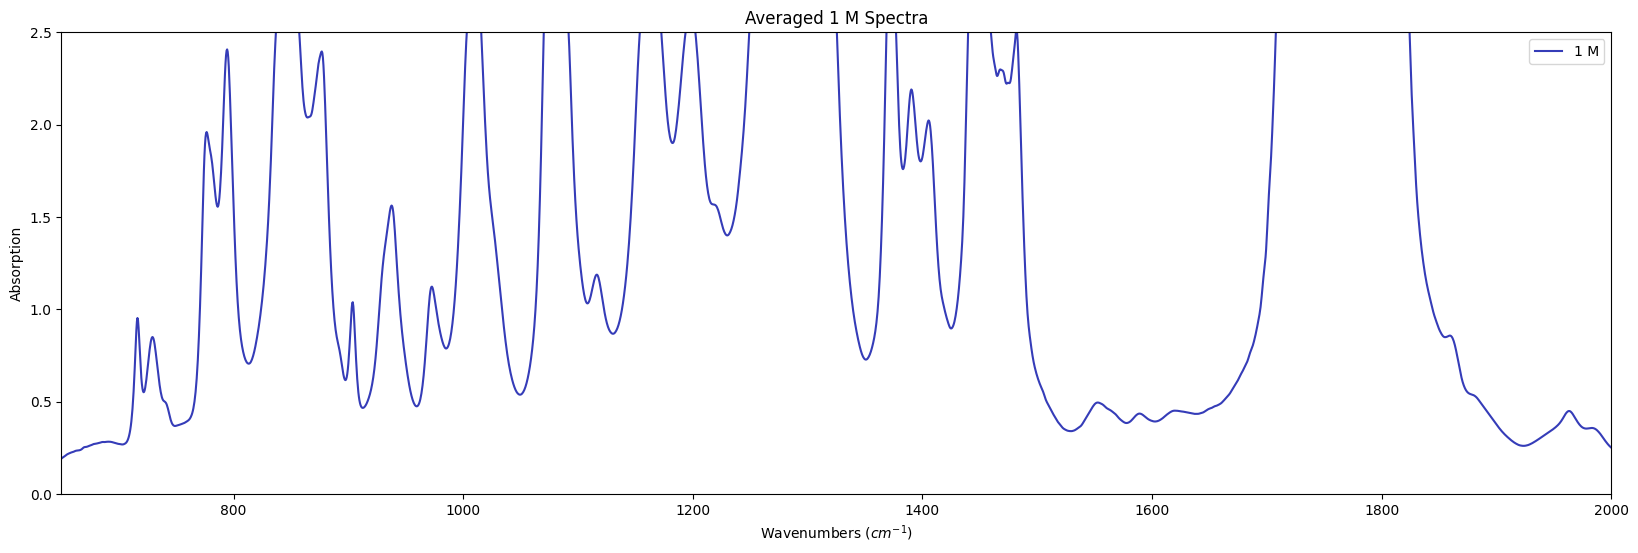

In [54]:
# ----- Averaging the spectra for 1 M

df0 = np.array([pd.read_csv(path1M + '1M_1.tsv',sep = '\t')[518:],pd.read_csv(path1M + '1M_2.tsv',sep = '\t')[518:],\
                   pd.read_csv(path1M + '1M_3.tsv',sep = '\t')[518:],pd.read_csv(path1M + '1M_4.tsv',sep = '\t'),\
                    pd.read_csv(path1M + '1M_5.tsv',sep = '\t'),pd.read_csv(path1M + '1M_6.tsv',sep = '\t')[518:]])

ZeroM = (df0[0] + df0[1] + df0[2] + df0[3] + df0[4] + df0[5]) / 6

df_1M = pd.DataFrame(ZeroM,columns = header_array)

# display(df_0M)

plt.figure(figsize = (20,6))
plt.plot(df_1M['X'],df_1M['Y'],label = '1 M', color = '#353cb8')
plt.legend()
plt.title('Averaged 1 M Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.ylim(0,2.5)
plt.xlim(650,2000)
plt.show()

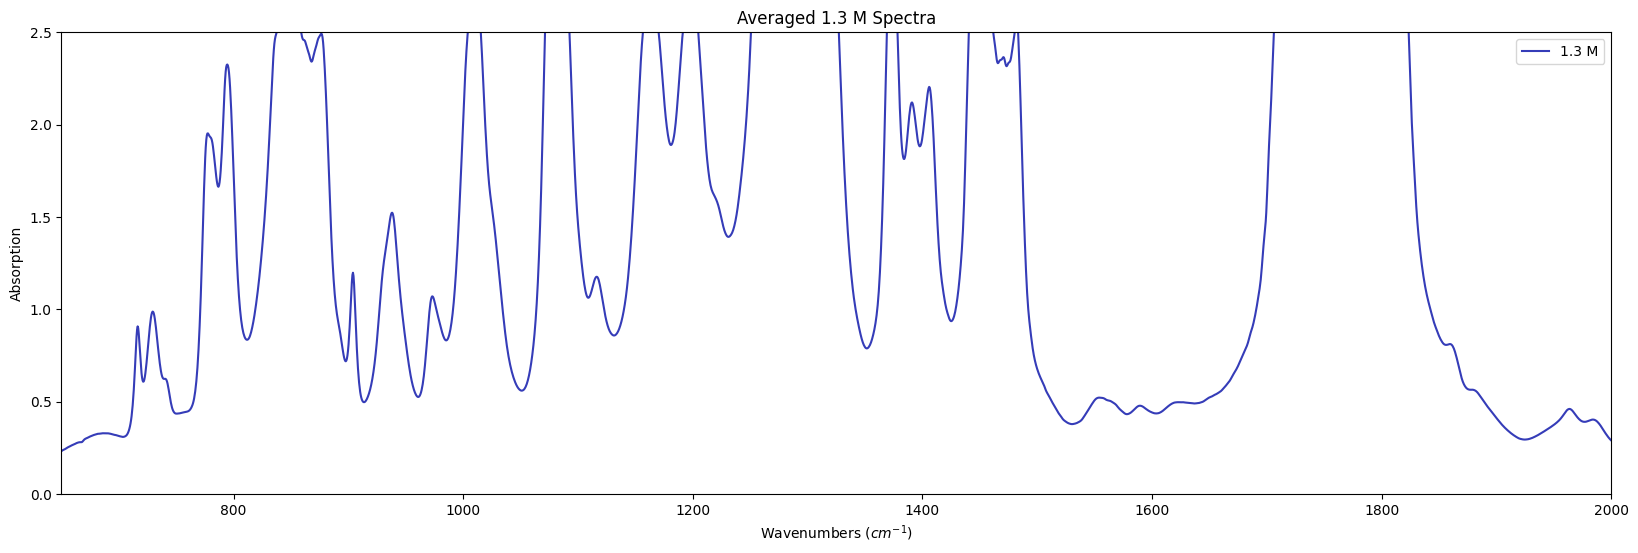

In [55]:
# ----- Averaging the spectra for 1.3 M
df0 = np.array([pd.read_csv(path1_3M + '1-3M_1.tsv',sep = '\t'),pd.read_csv(path1_3M + '1-3M_2.tsv',sep = '\t'),\
                   pd.read_csv(path1_3M + '1-3M_3.tsv',sep = '\t'),pd.read_csv(path1_3M + '1-3M_4.tsv',sep = '\t'),\
                    pd.read_csv(path1_3M + '1-3M_5.tsv',sep = '\t'),pd.read_csv(path1_3M + '1-3M_6.tsv',sep = '\t')])

ZeroM = (df0[0] + df0[1] + df0[2] + df0[3] + df0[4] + df0[5]) / 6

df_1_3M = pd.DataFrame(ZeroM,columns = header_array)

# display(df_0M)

plt.figure(figsize = (20,6))
plt.plot(df_1_3M['X'],df_1_3M['Y'],label = '1.3 M', color = '#353cb8')
plt.legend()
plt.title('Averaged 1.3 M Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.ylim(0,2.5)
plt.xlim(650,2000)
plt.show()

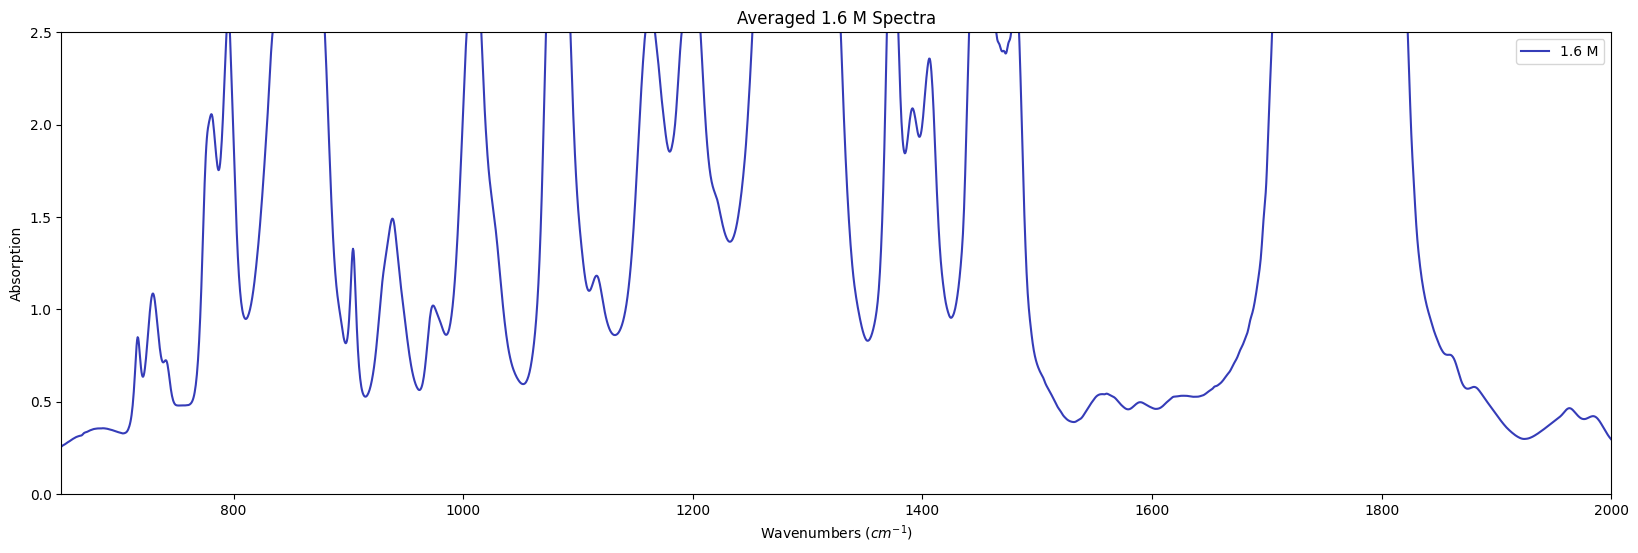

In [56]:
# ----- Averaging the spectra for 1.6 M
df0 = np.array([pd.read_csv(path1_6M + '1-6M_1.tsv',sep = '\t'),pd.read_csv(path1_6M + '1-6M_2.tsv',sep = '\t'),\
                   pd.read_csv(path1_6M + '1-6M_3.tsv',sep = '\t'),pd.read_csv(path1_6M + '1-6M_4.tsv',sep = '\t'),\
                    pd.read_csv(path1_6M + '1-6M_5.tsv',sep = '\t'),pd.read_csv(path1_6M + '1-6M_6.tsv',sep = '\t')])

ZeroM = (df0[0] + df0[1] + df0[2] + df0[3] + df0[4] + df0[5]) / 6

df_1_6M = pd.DataFrame(ZeroM,columns = header_array)

# display(df_0M)

plt.figure(figsize = (20,6))
plt.plot(df_1_6M['X'],df_1_6M['Y'],label = '1.6 M', color = '#353cb8')
plt.legend()
plt.title('Averaged 1.6 M Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.ylim(0,2.5)
plt.xlim(650,2000)
plt.show()

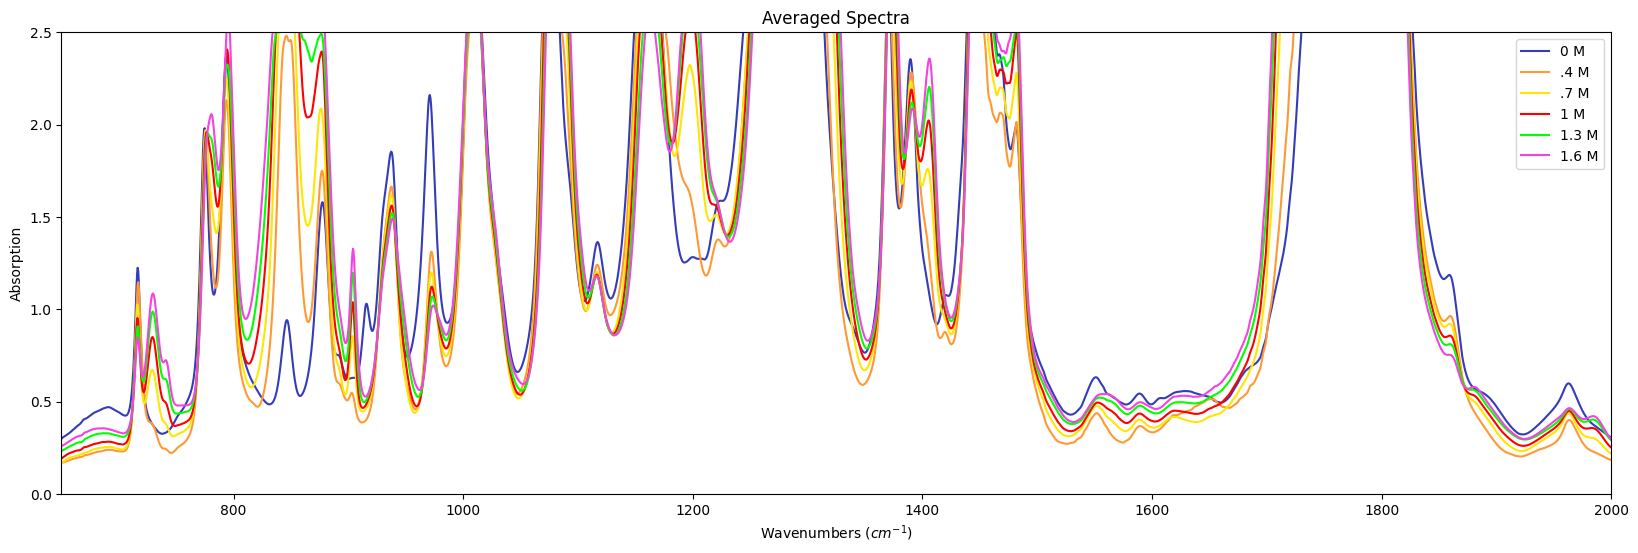

In [50]:
# ----- Plot all averaged spectra at once
plt.figure(figsize = (20,6))

# plot the spectra
plt.plot(df_0M['X'],df_0M['Y'],label = '0 M', color = '#353cb8')
plt.plot(df__4M['X'],df__4M['Y'] + .13,label = '.4 M', color = '#ff9933')
plt.plot(df__7M['X'],df__7M['Y'],label = '.7 M', color = '#fce703')
plt.plot(df_1M['X'],df_1M['Y'],label = '1 M', color = '#ff0000')
plt.plot(df_1_3M['X'],df_1_3M['Y'],label = '1.3 M', color = '#00ff00')
plt.plot(df_1_6M['X'],df_1_6M['Y'],label = '1.6 M', color = '#f542e0')

# format the graph
plt.legend()
plt.title('Averaged Spectra')
plt.xlabel(r'Wavenumbers ($cm^{-1}$)')
plt.ylabel('Absorption')
plt.xlim(650,2000)
plt.ylim(0,2.5)
plt.show()